In [34]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd
import plotly.express as px
warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8
df = pd.read_csv('data/mlbootcamp5_train.csv')
df.head(10)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.0    130     90            3     3      0   
8  13  17668       1     158    71.0    110     70            1     1      0   
9  14  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
5     0       0       0  
6     0       1       0  
7     0       1       1  
8     0       1       0  
9     0       0       0

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cardio'),
  Text(3, 0, 'cholesterol'),
  Text(4, 0, 'gender'),
  Text(5, 0, 'gluc'),
  Text(6, 0, 'smoke')])

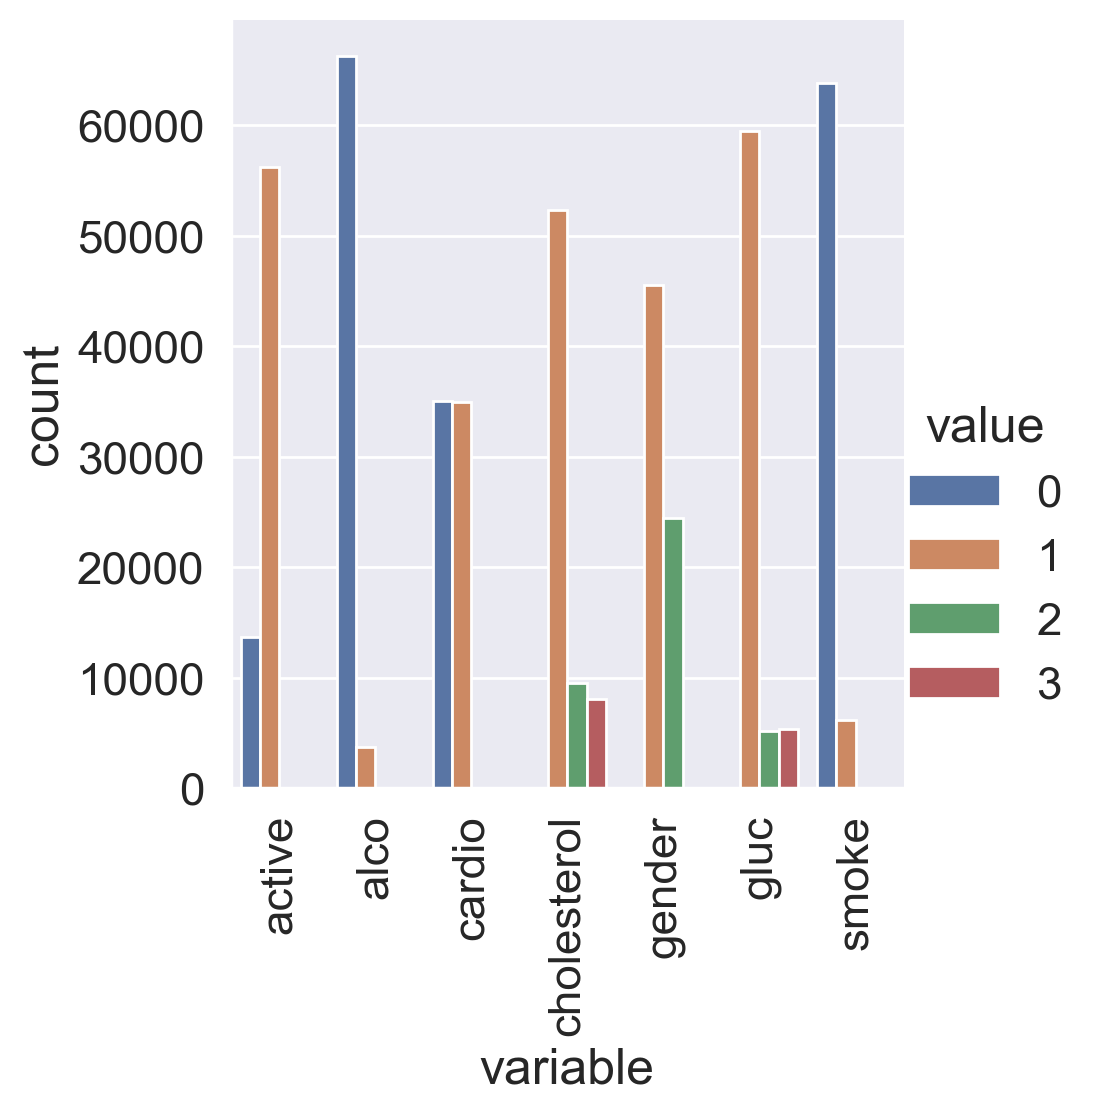

In [7]:
df_uniques = pd.melt(frame = df, value_vars = ['gender','cholesterol','gluc','smoke','alco','active','cardio'])
df_uniques = (
    pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count())
    .sort_index(level=[0, 1])
    .rename(columns={'value':'count'})
    .reset_index()
)

sns.catplot(
    x='variable', y='count', hue='value', data = df_uniques, kind='bar'
)
plt.xticks(rotation='vertical')

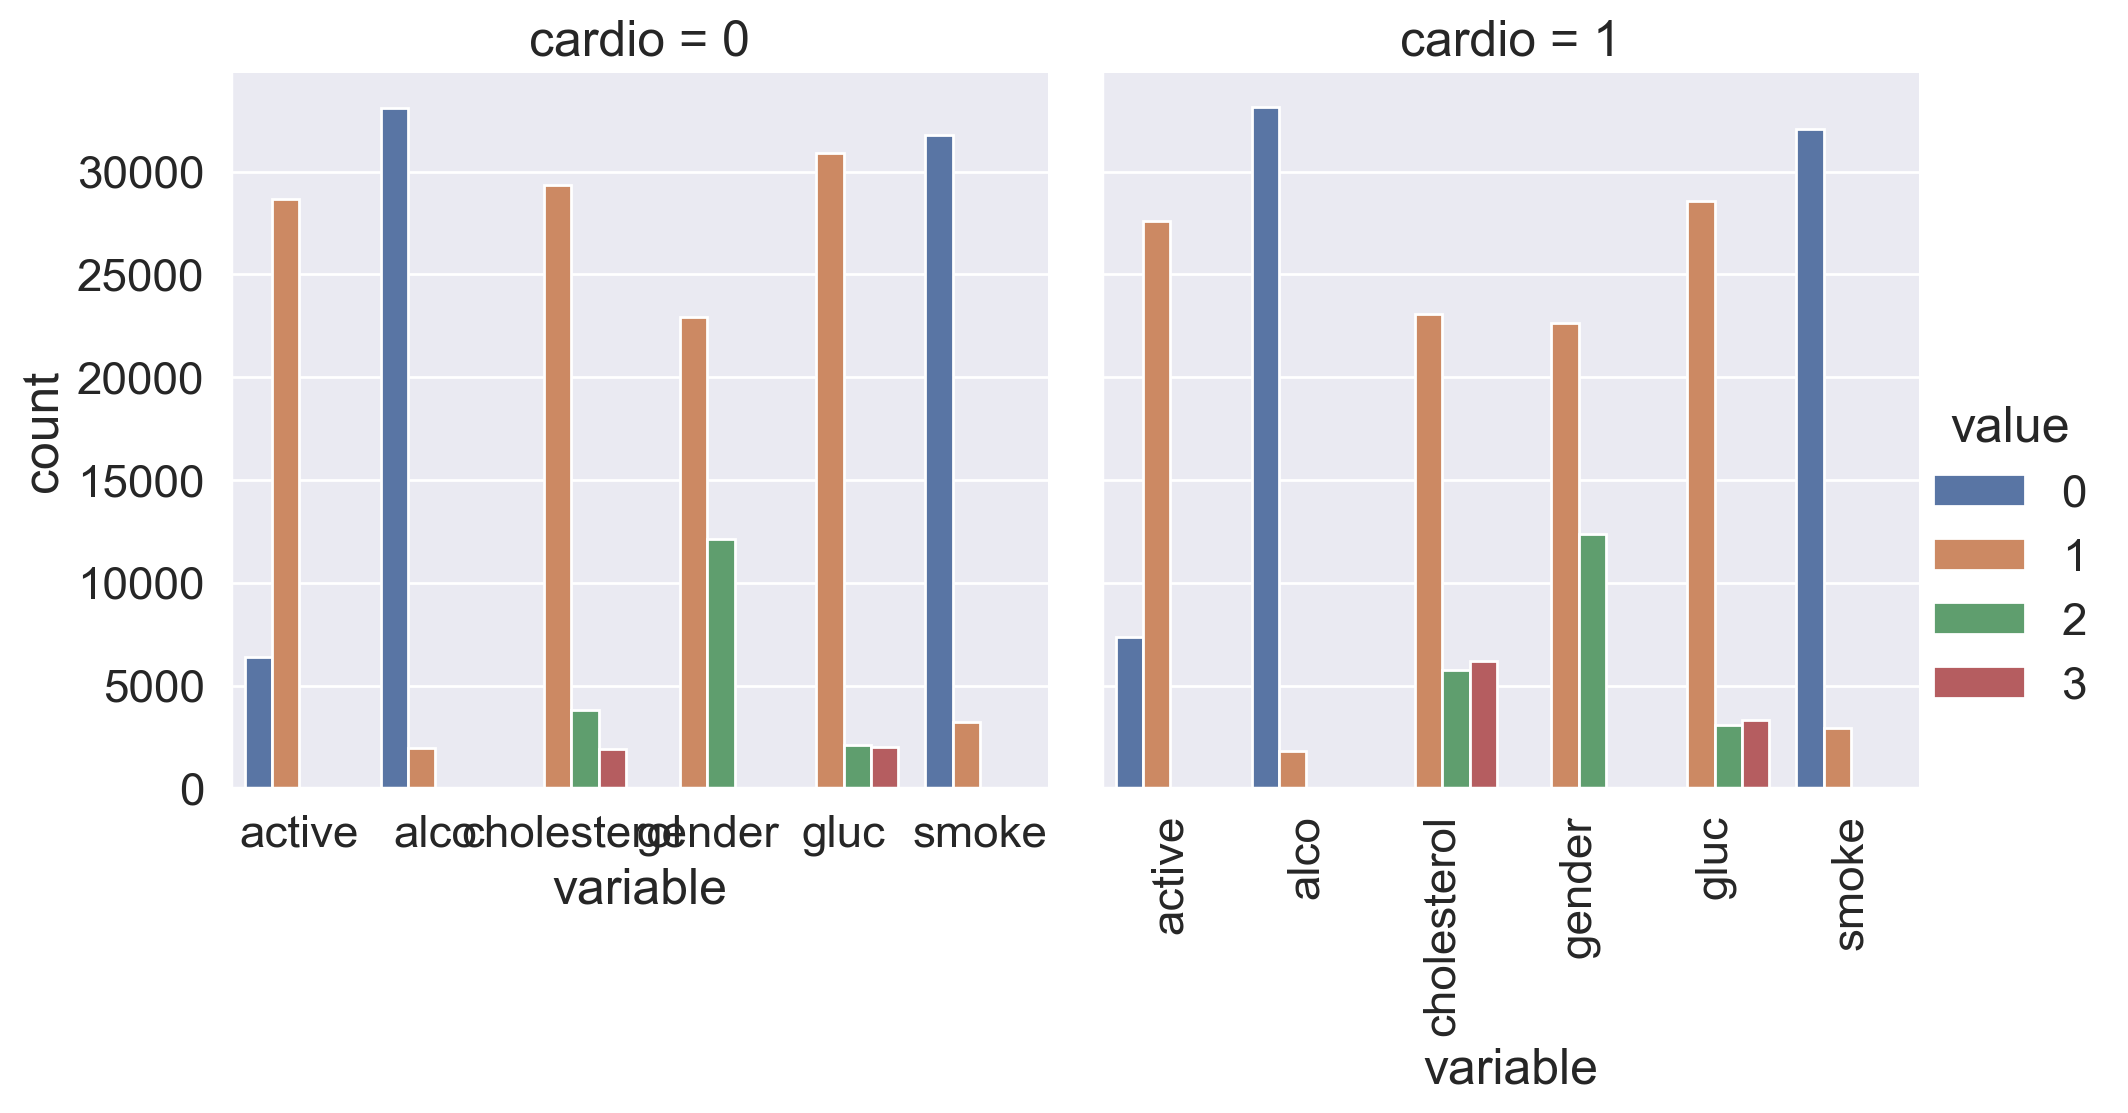

In [12]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

In [13]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")
    

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


            height
gender            
1       161.355612
2       169.947895
   gender  count
0       1  45530
1       2  24470


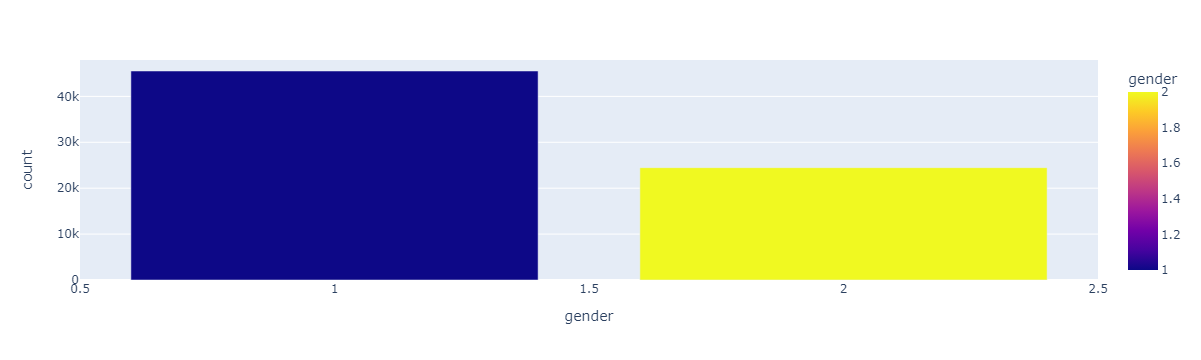

In [37]:
# Question 1.1. (1 point). How many men and women are present in this dataset? 
# Values of the gender feature were not given (whether “1” stands for women or for men) – 
# figure this out by looking analyzing height, making the assumption that men are taller on average.
height_df = df[['gender','height']]
height_df = height_df.groupby('gender').mean()
height_df_count = df[['gender','height']].groupby(by = 'gender', as_index=False).count().rename(columns={'height':'count'})
fig = px.bar(height_df_count, x = 'gender', y = 'count', color='gender')
print(height_df)
print(height_df_count)
fig.show()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64


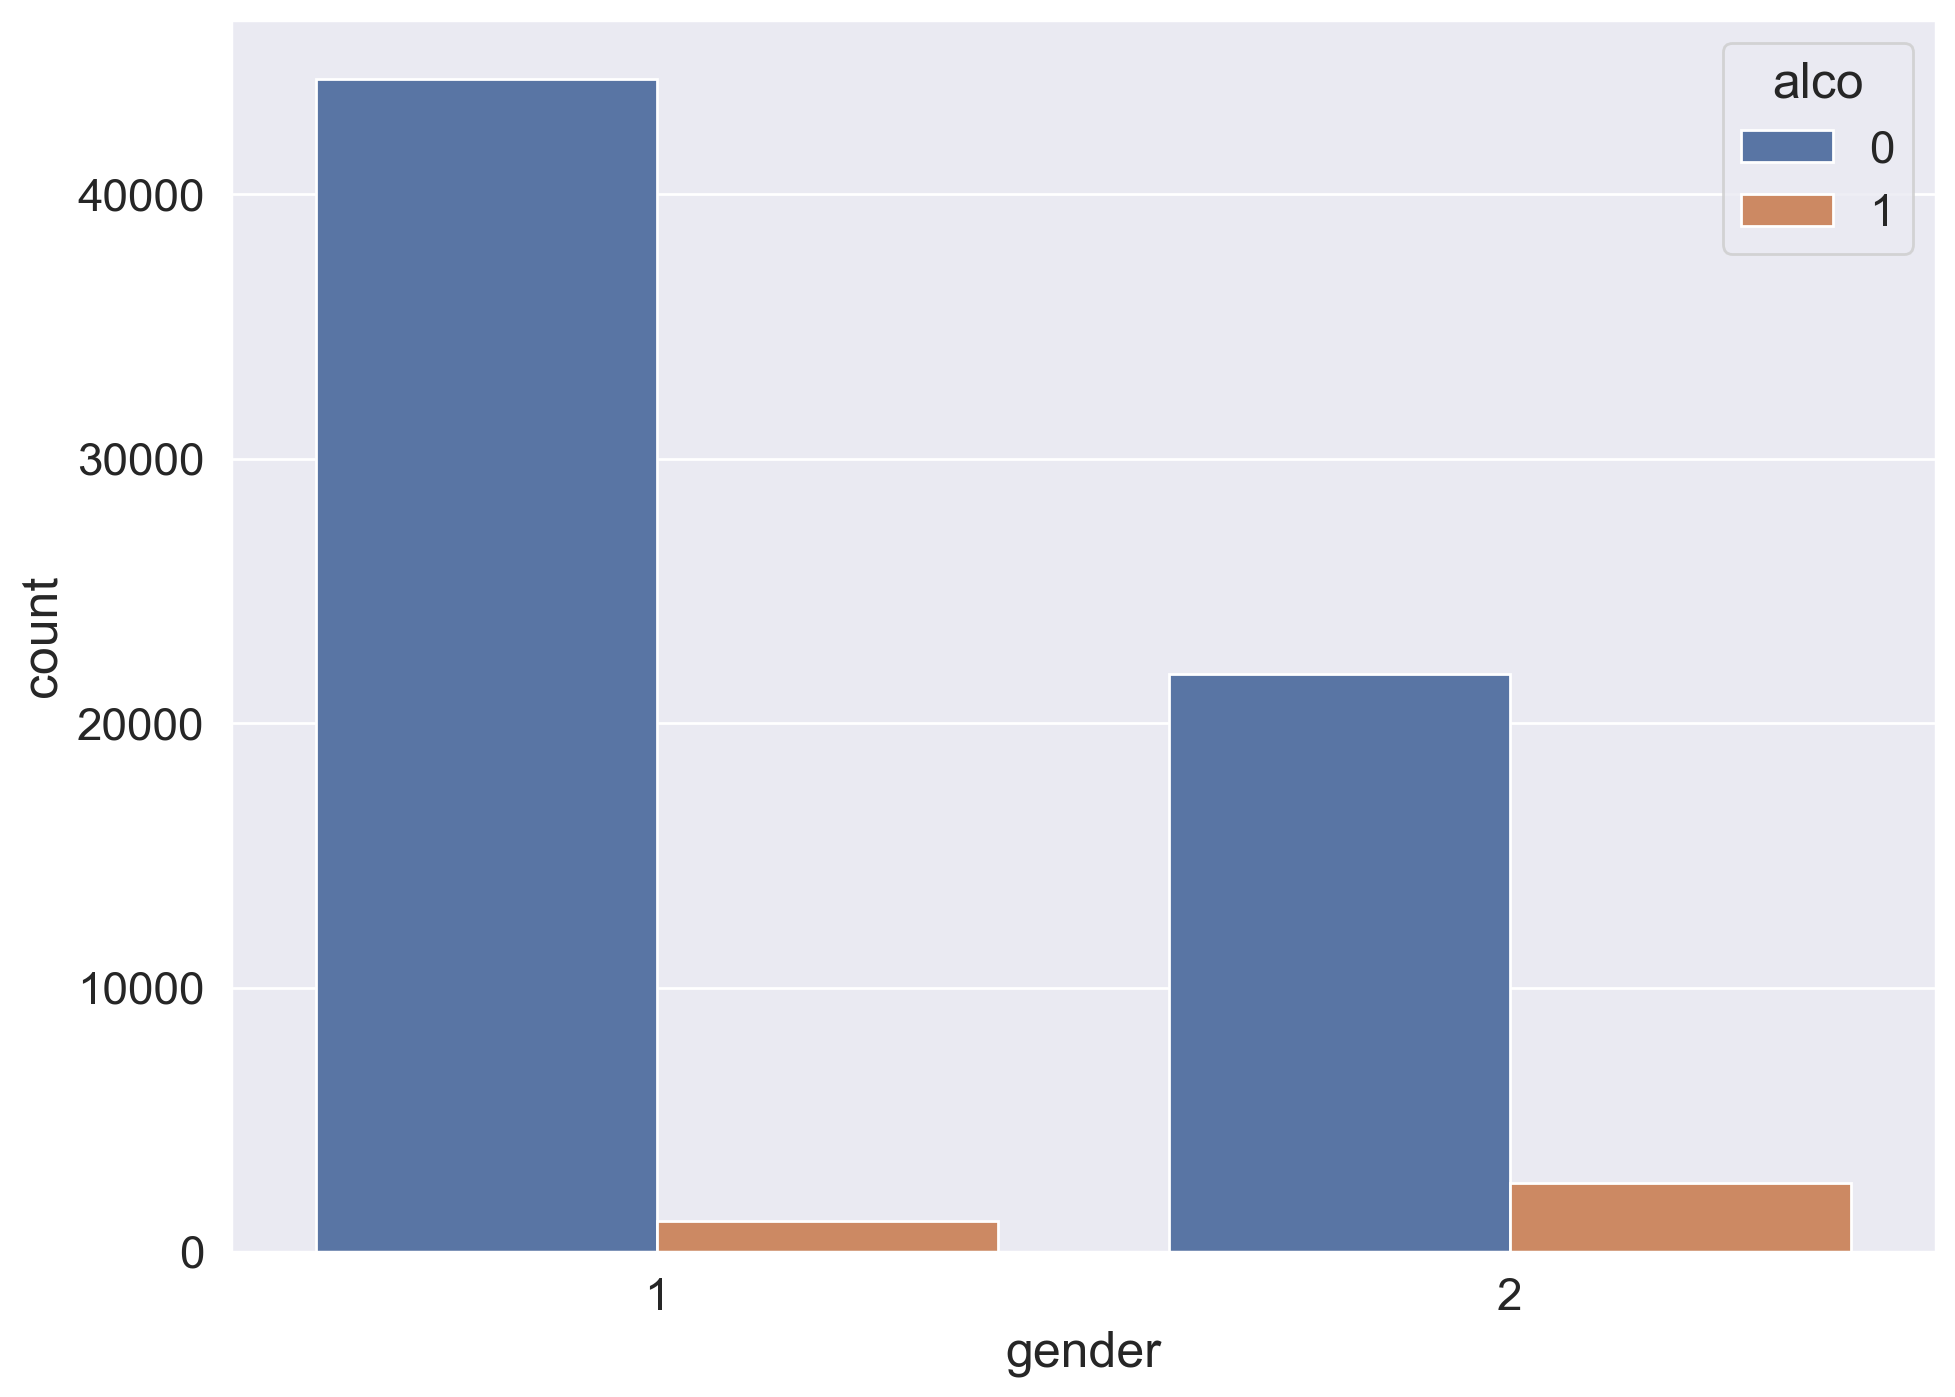

In [48]:
# Question 1.2. (1 point). Who more often report consuming alcohol – men or women?
alc_df = df[['gender', 'alco']]
alc_df['count'] = 0
alc_df = alc_df.groupby(by=['gender', 'alco'], as_index = False).agg({'count':'count'})
sns.barplot(x='gender', y='count', data=alc_df, hue='alco')
print(df.groupby("gender")["alco"].mean())

20


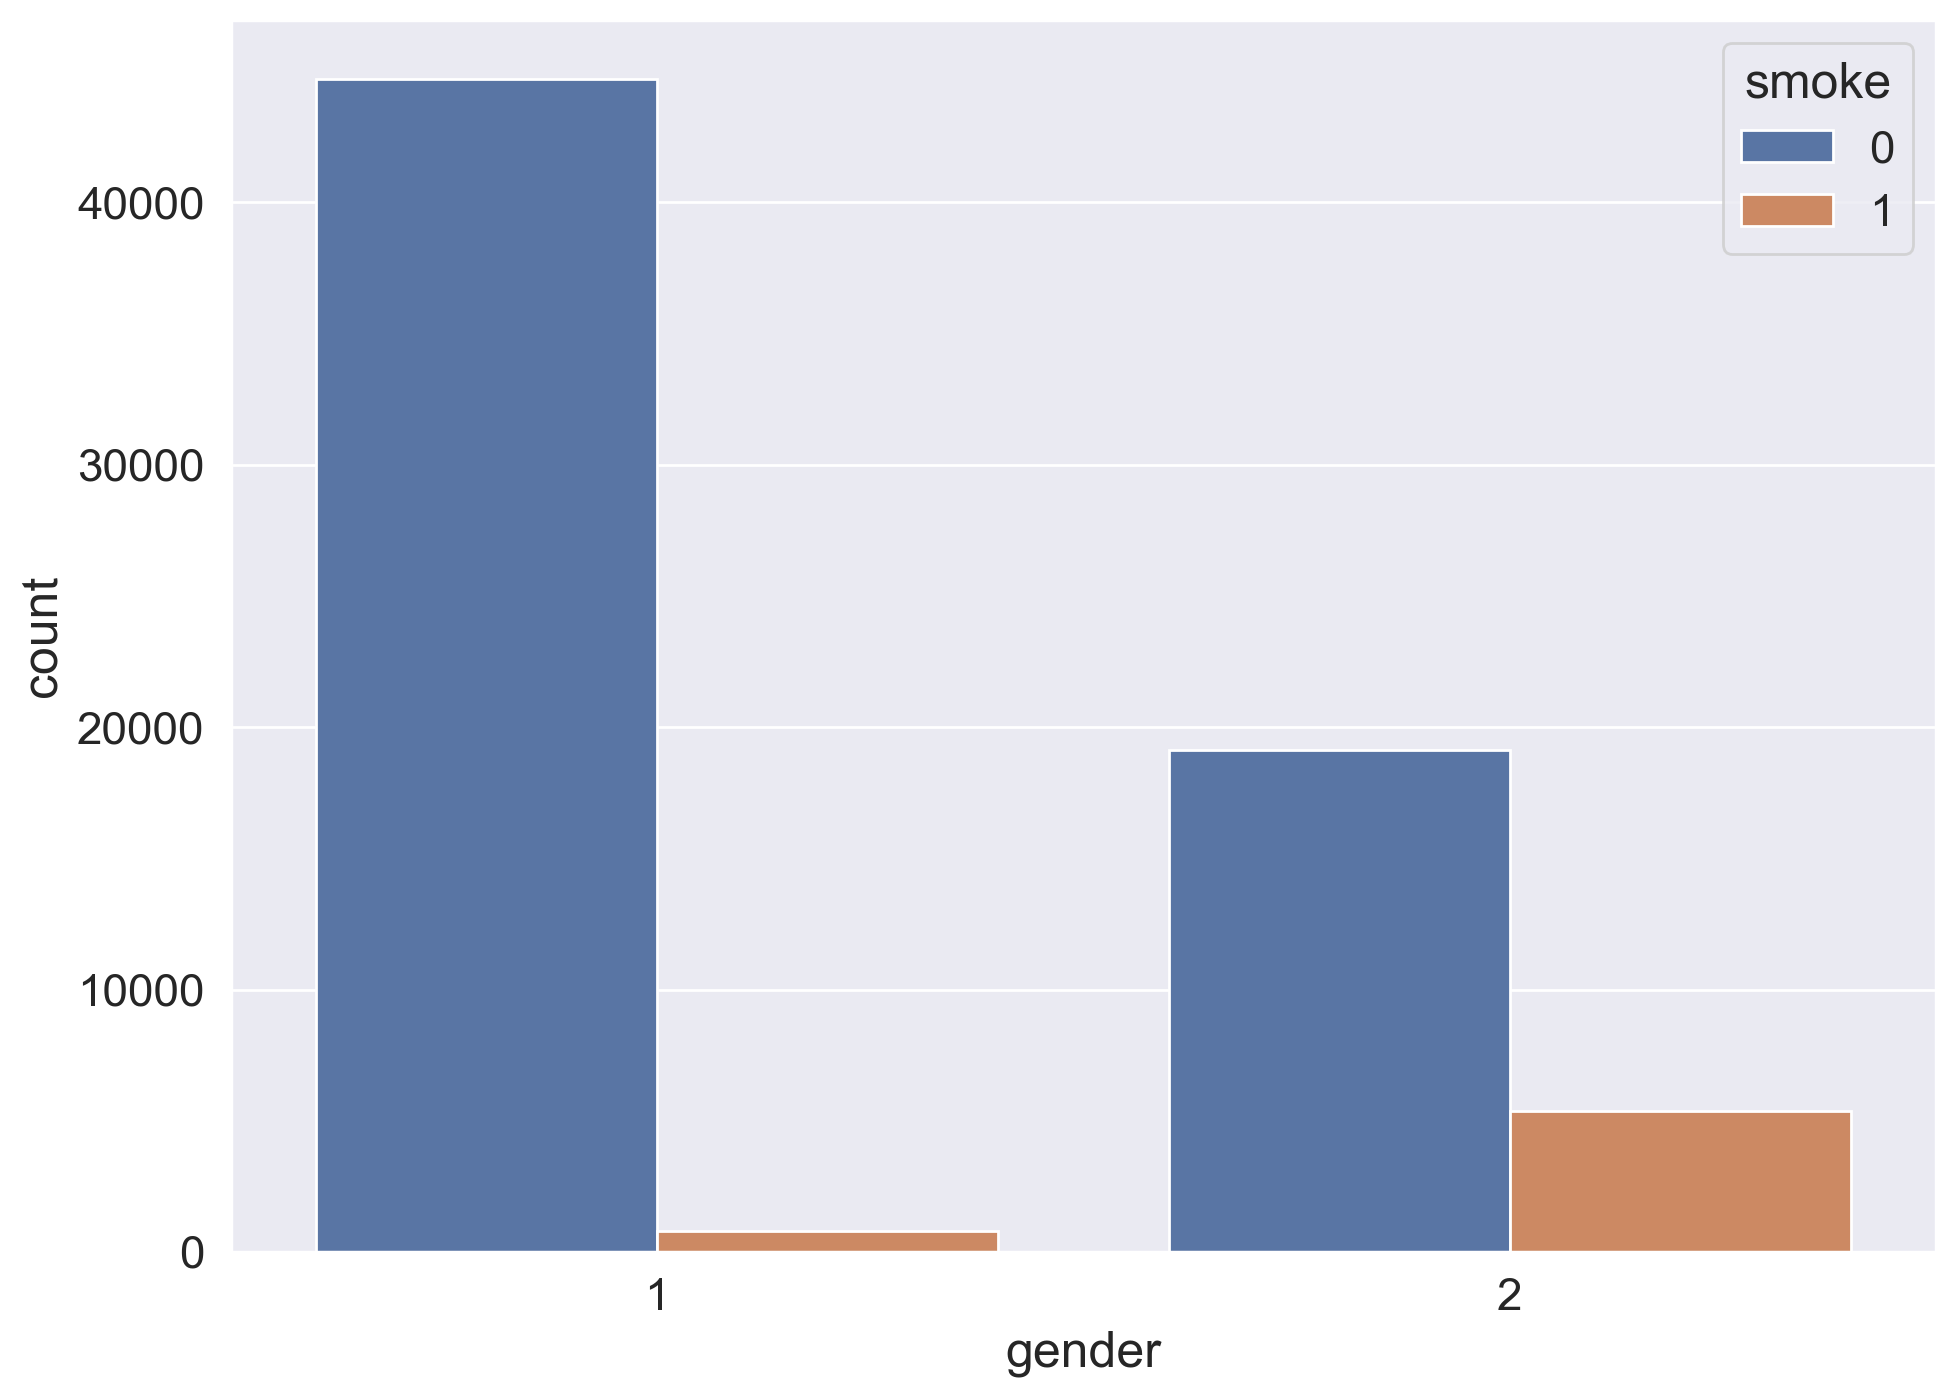

In [47]:
# Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?
smokers_df = df[['gender','smoke']]
smokers_df['count'] = 0
smokers_df = smokers_df.groupby(by=['gender','smoke'],as_index=False).agg({'count':'count'})
smokers_df
sns.barplot(x='gender', y='count', data=smokers_df, hue='smoke')
print(round(
    100
    * (
        df.loc[df["gender"] == 2, "smoke"].mean()
        - df.loc[df["gender"] == 1, "smoke"].mean()
    )
))

In [52]:
# Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? 
# You’ll need to figure out the units of feature age in this dataset.
(df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median())/365.25 * 12

19.613963039014372

In [53]:
# Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task.
# What’s the ratio of these two fractions?
df["age_years"] = (df["age"] / 365.25).round().astype("int")
df["age_years"].max()

65

In [54]:
# Question 1.6. (2 points). Choose the correct statements:.
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2
df["BMI"].median()

26.374068120774975

In [56]:
#Question 1.7. (2 points). What percent of the original data (rounded) did we filter out in the previous step?
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_to_remove.shape[0] / df.shape[0])

0.0963


<Axes: >

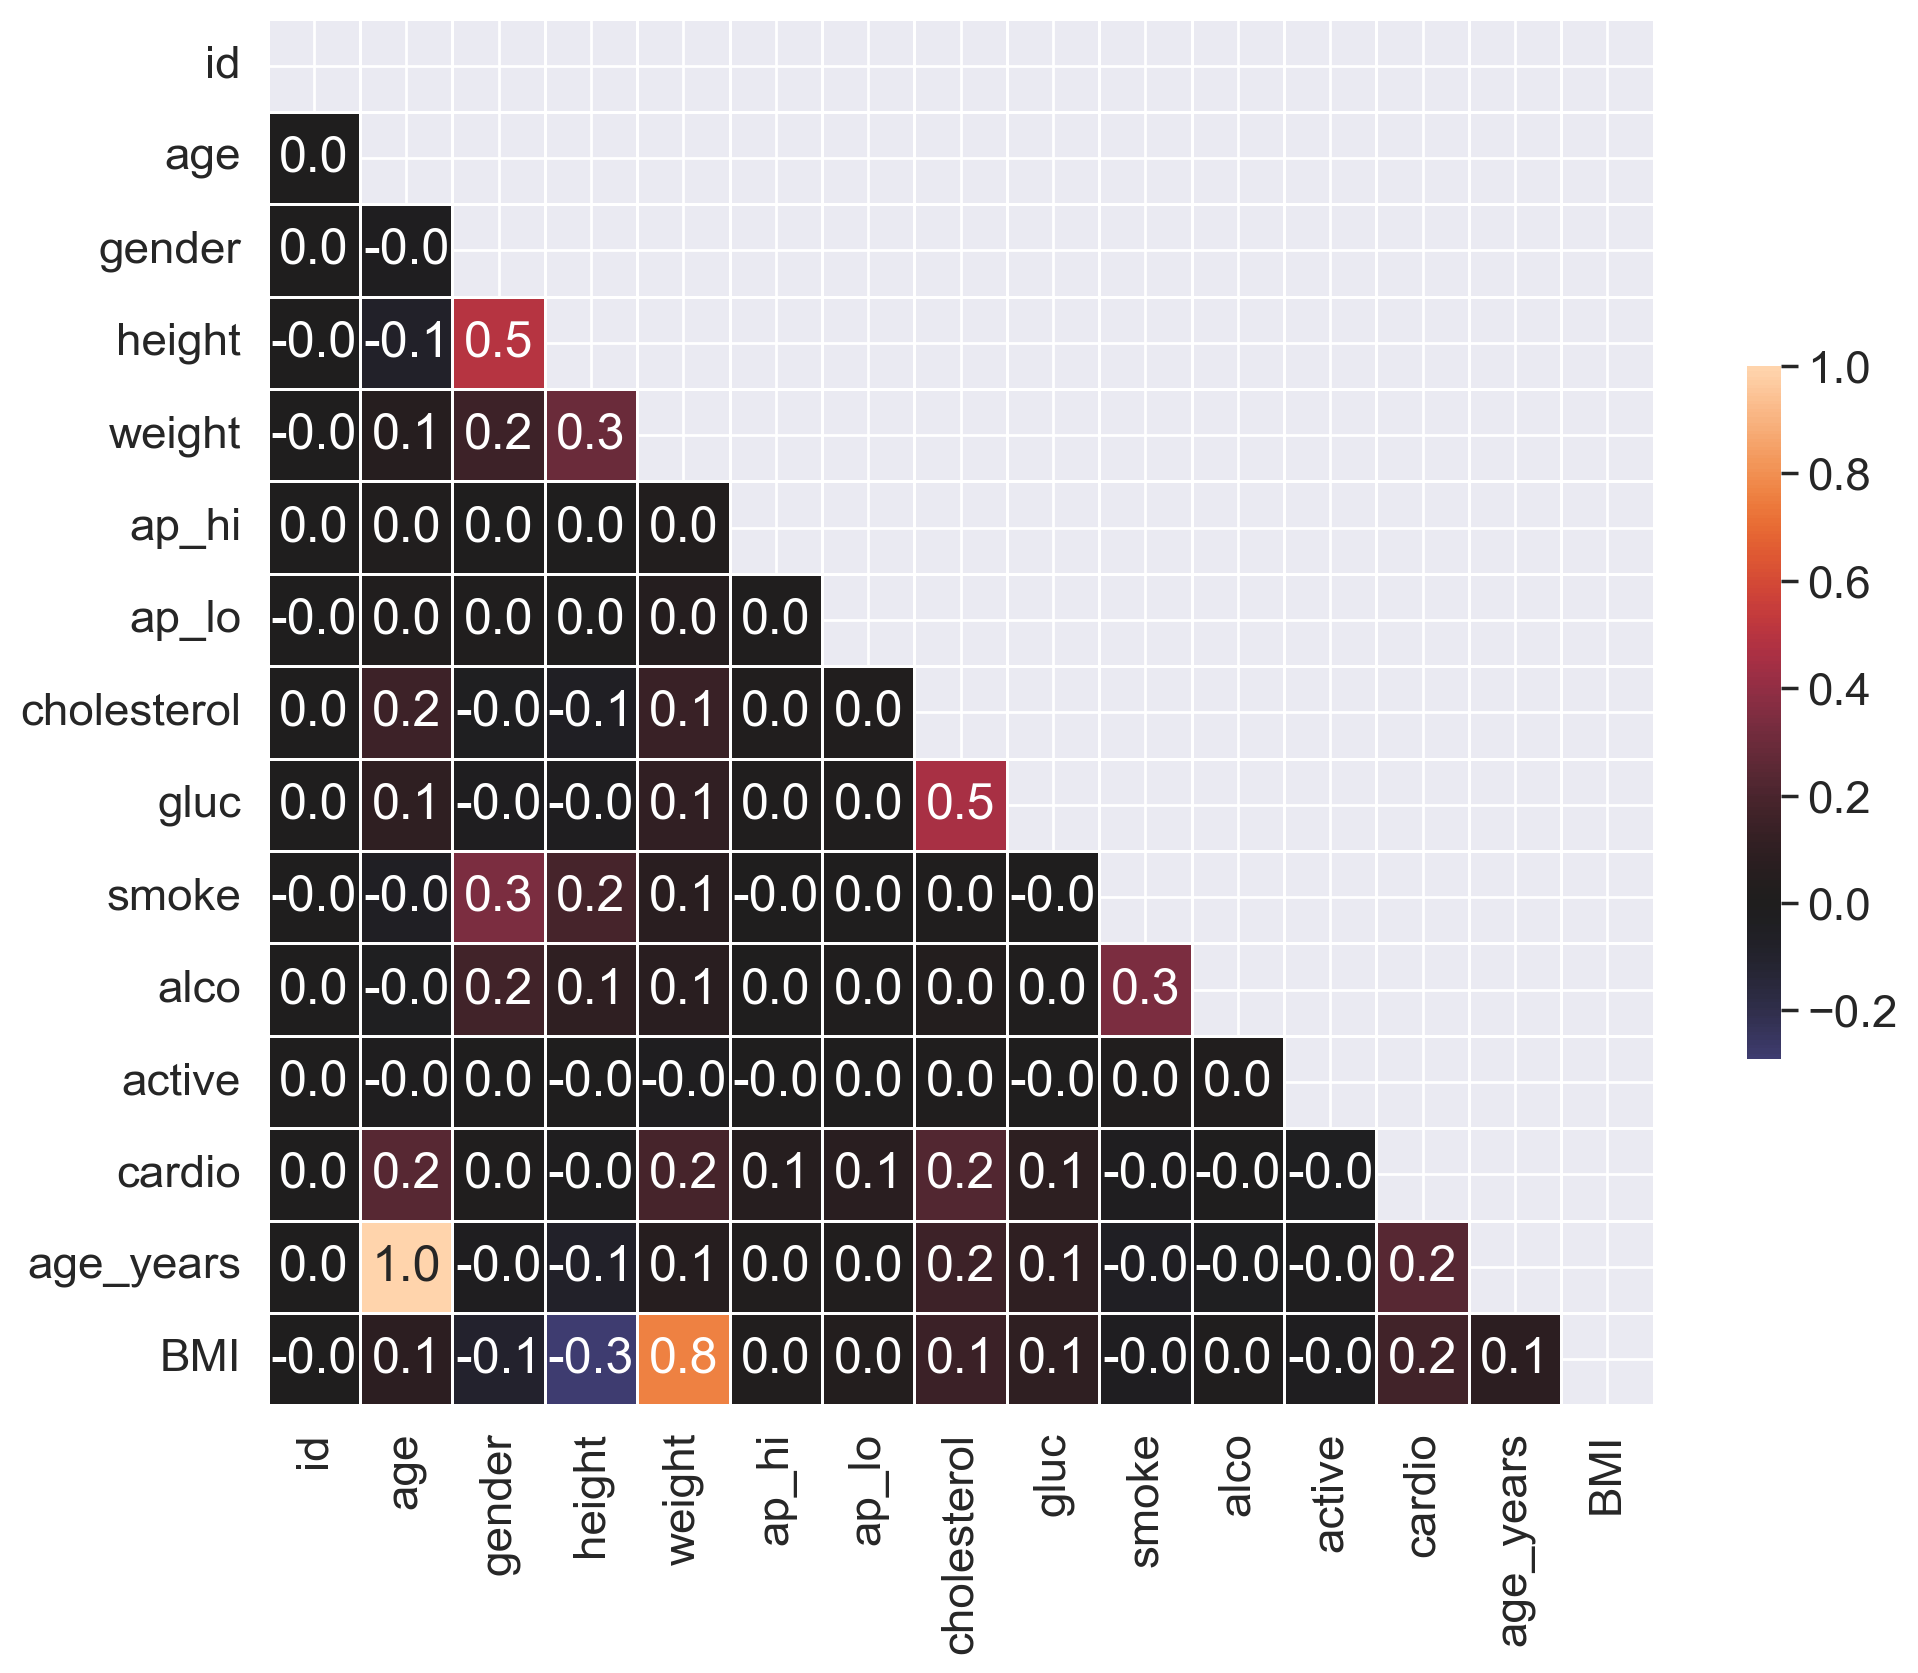

In [60]:
#2.1. Correlation matrix visualization
#Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?
filtered_df = df[~df.index.isin(df_to_remove)]
cor_df = filtered_df.copy()
corr = cor_df.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt='.1f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink":0.5}
)

<Axes: >

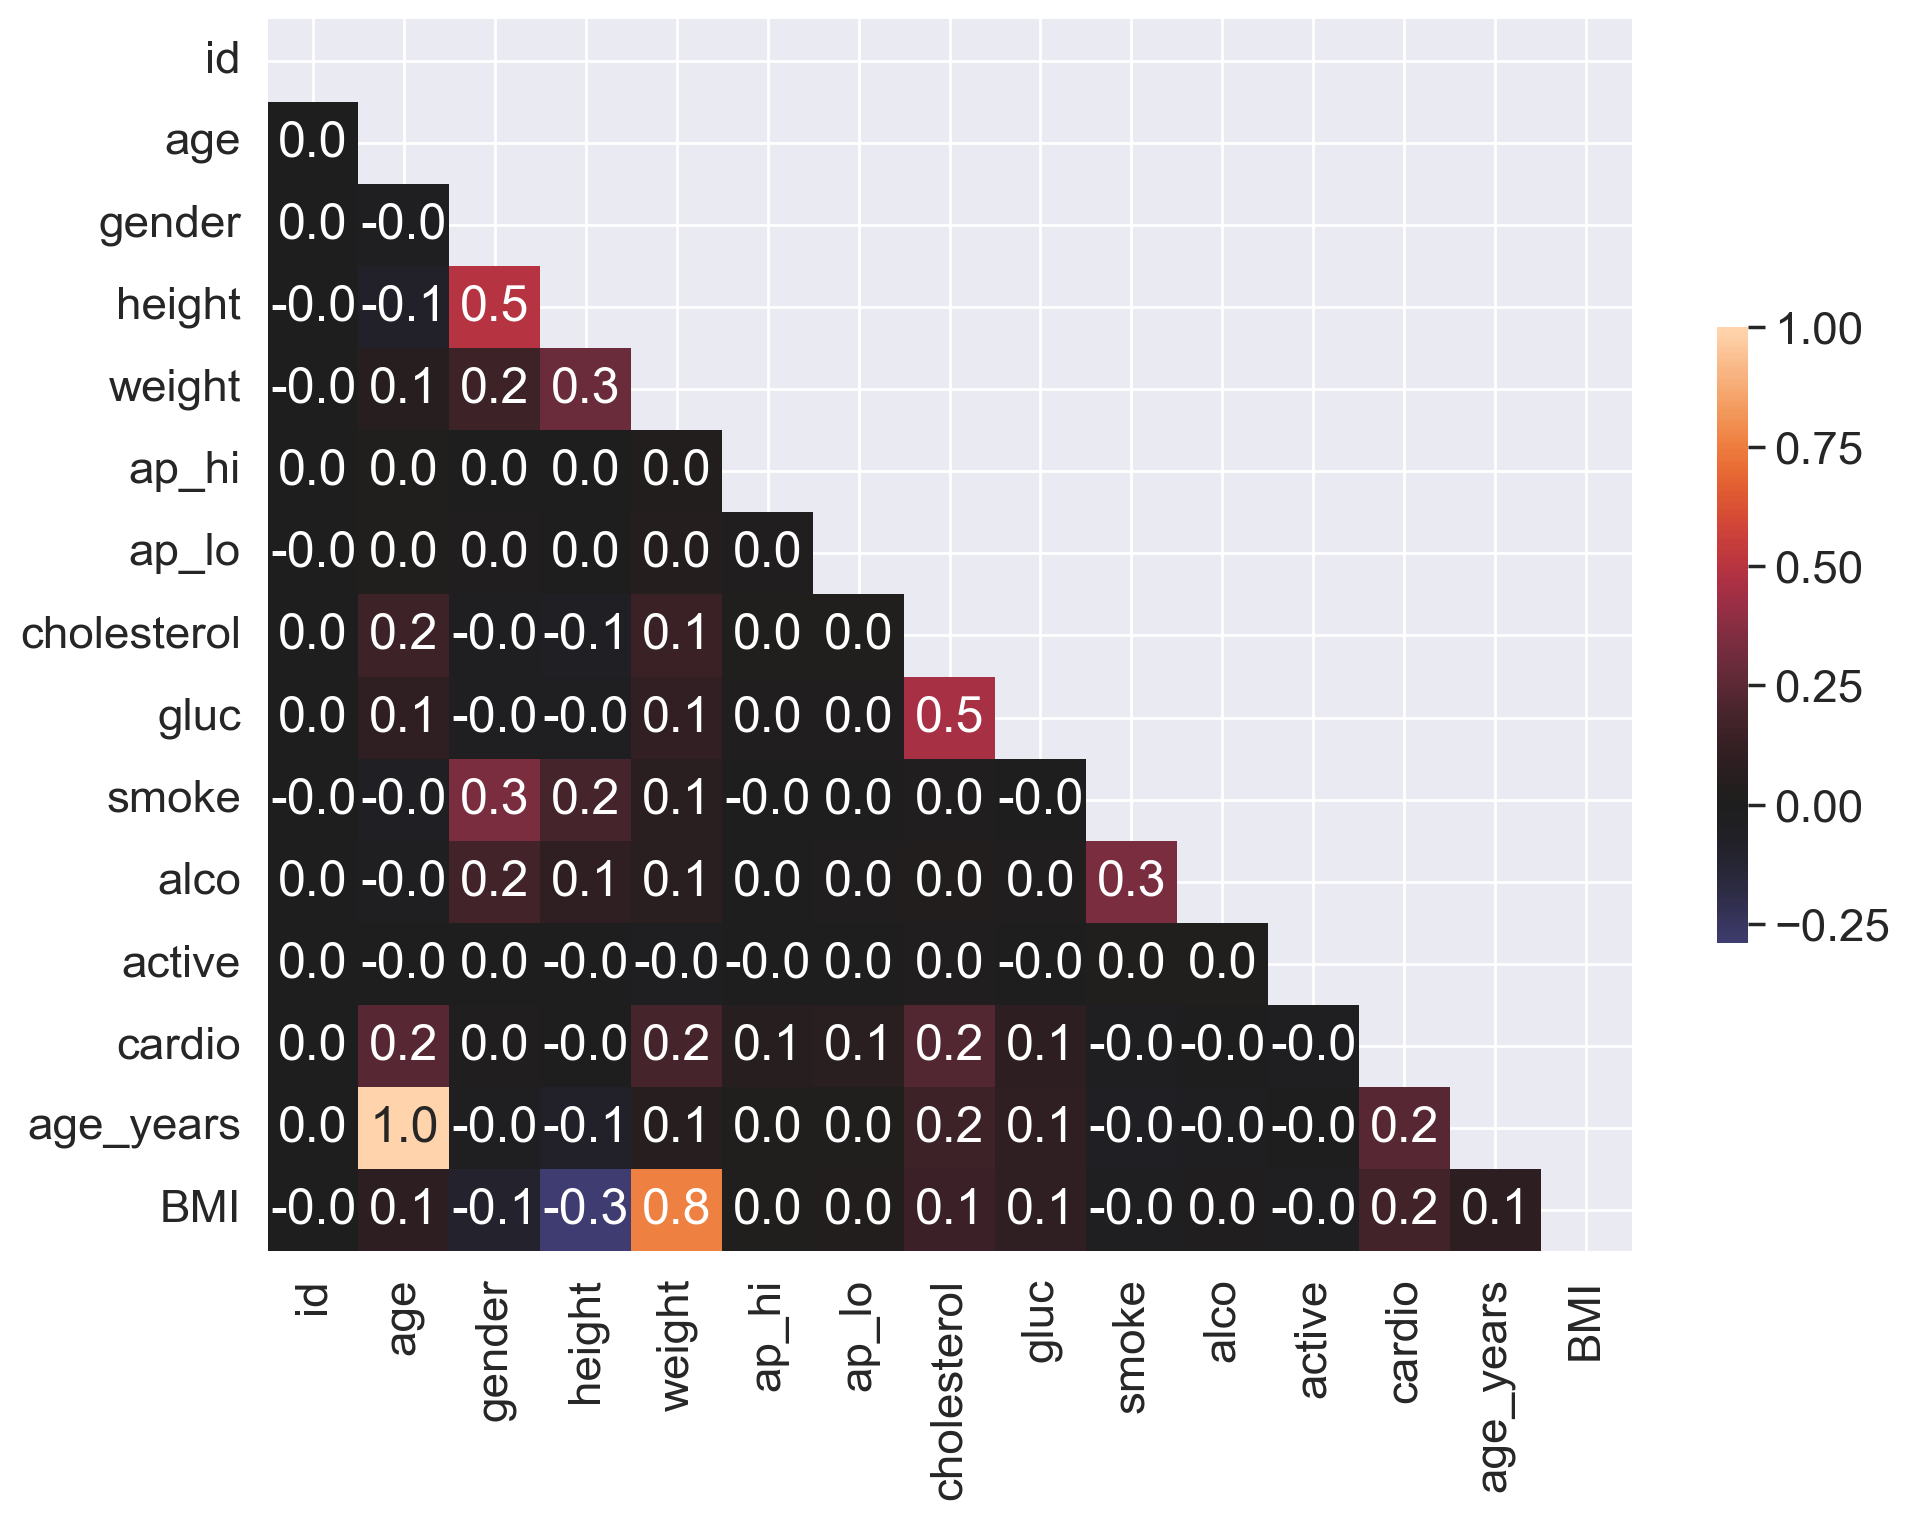

In [78]:
sns.heatmap(corr, mask=mask, vmax=1, annot=True, fmt='.1f', cbar_kws={"shrink":0.5}, center=0)

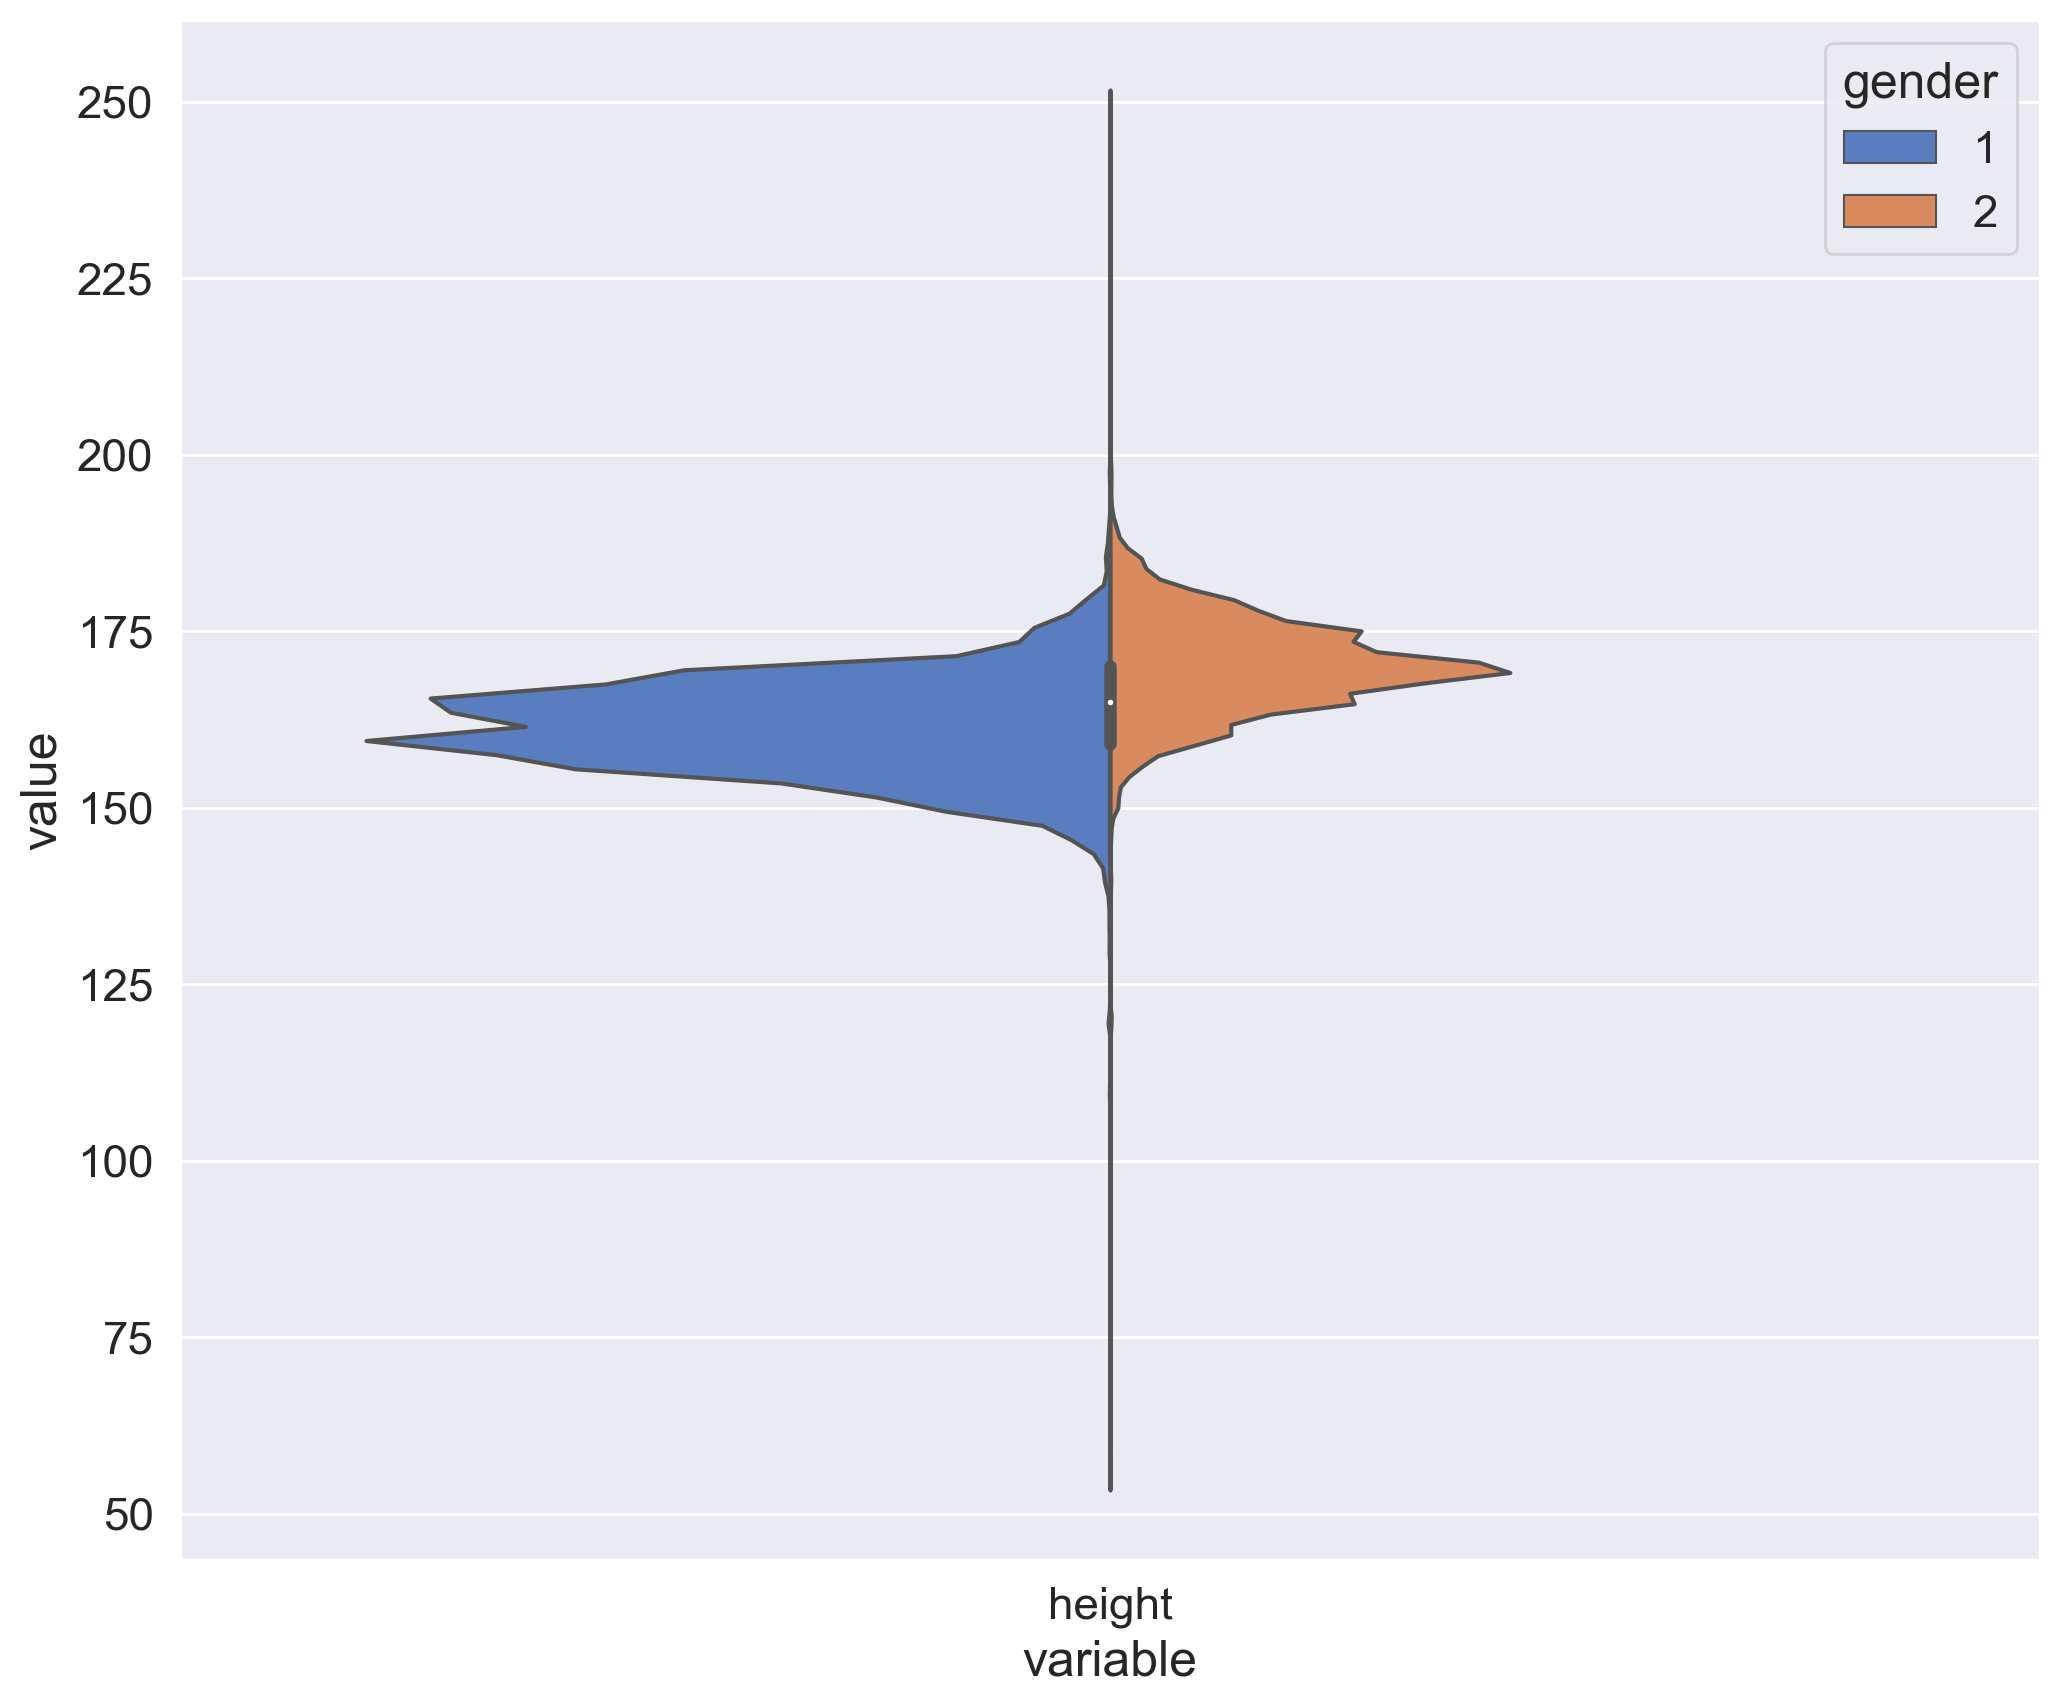

In [79]:
# 2.2. Height distribution of men and women
# Create a violin plot for the height and gender using violinplot()
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

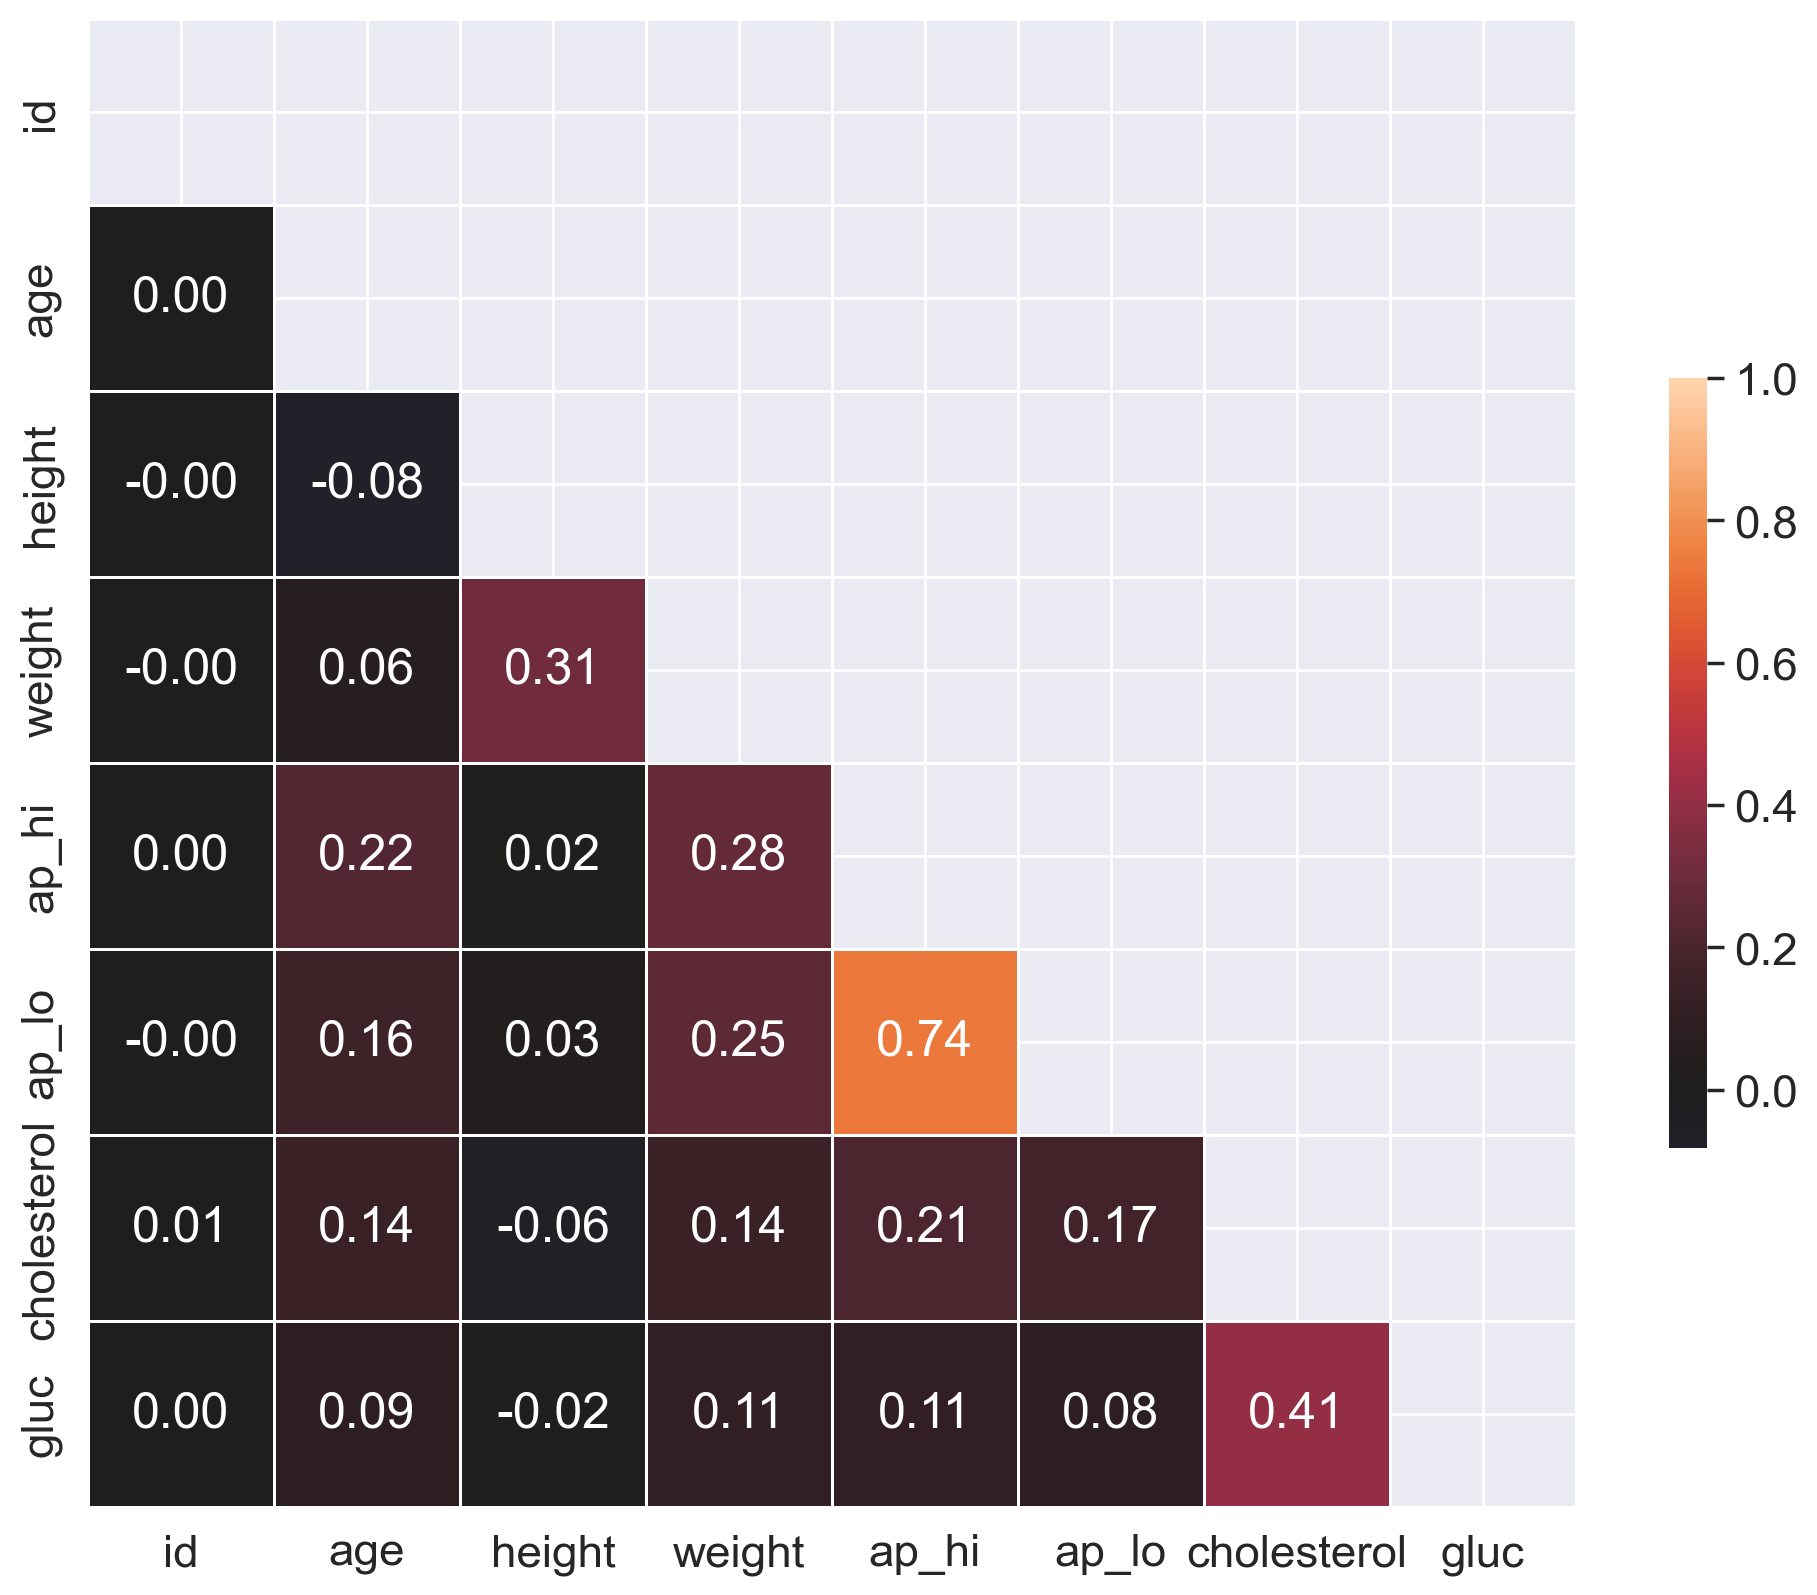

In [80]:
#2.3. Rank correlation
# Calculate and plot a correlation matrix using the Spearman’s rank correlation coefficient.
#Question 2.2. (1 point). Which pair of features has the strongest Spearman rank correlation?
#Question 2.3. (1 point). Why do these features have strong rank correlation?
# Calculate the correlation matrix
corr = df[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

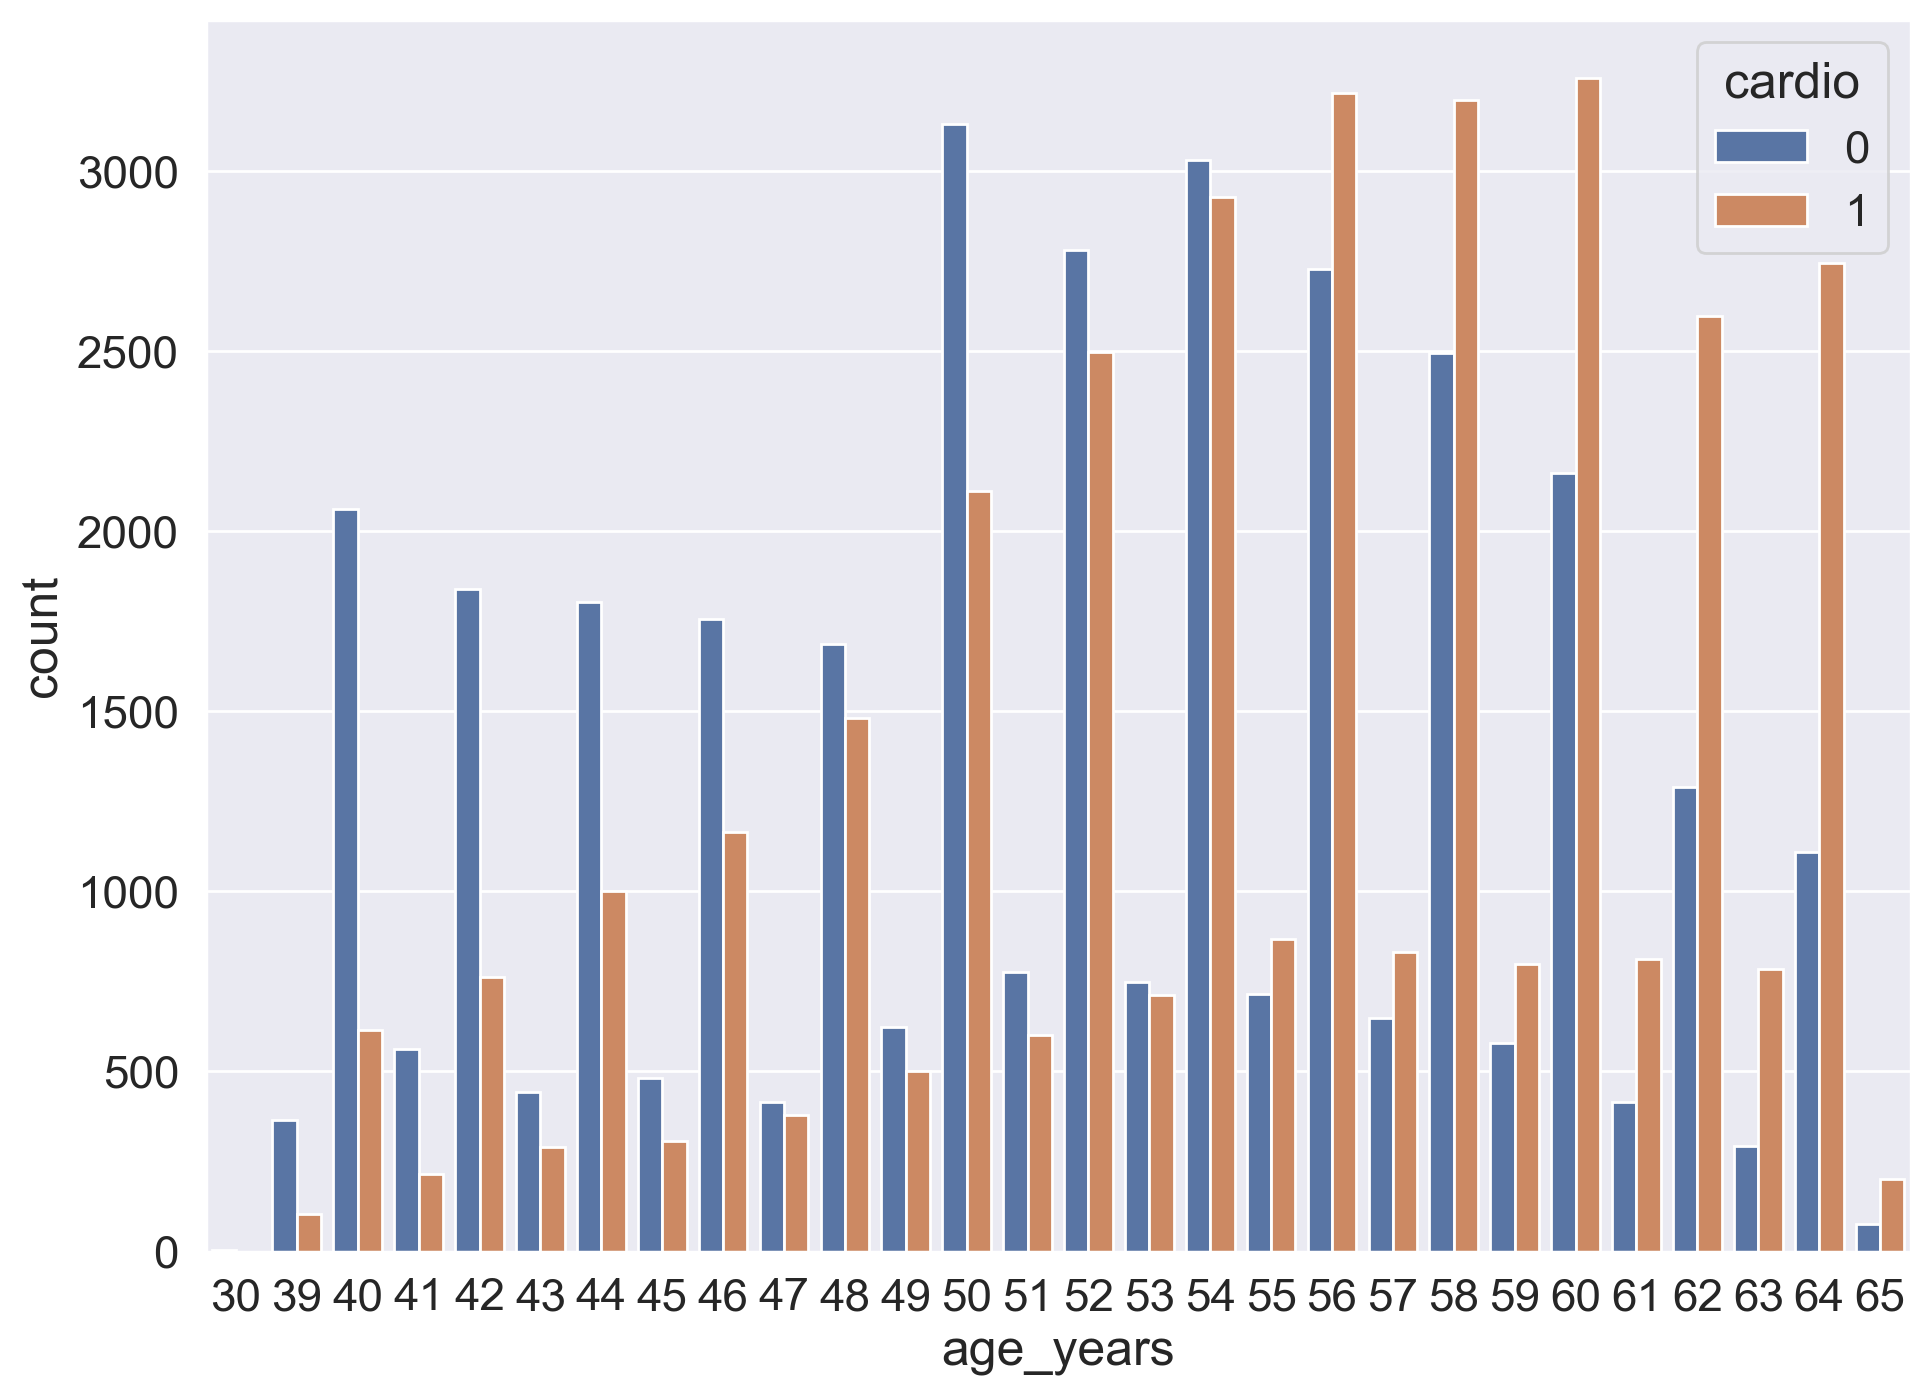

In [81]:
#Create a count plot using countplot(), with the age on the X axis and the number of people on the Y axis.
sns.countplot(x="age_years", hue="cardio", data=df);